In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd

[   0    1    2 ... 4093 4094 4095]
[618, 1261, 1267, 1328, 1394, 1456, 1509, 1514, 1518, 1580, 1705, 1769, 2773]
[1202, 1203, 1204, 1205, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1577, 1578, 1579, 1580, 1581, 1641, 1642, 1643, 1644, 1645, 1705, 1706, 1707, 1708, 1709, 1769, 1770, 1771, 1772, 1773]
<class 'numpy.ndarray'>


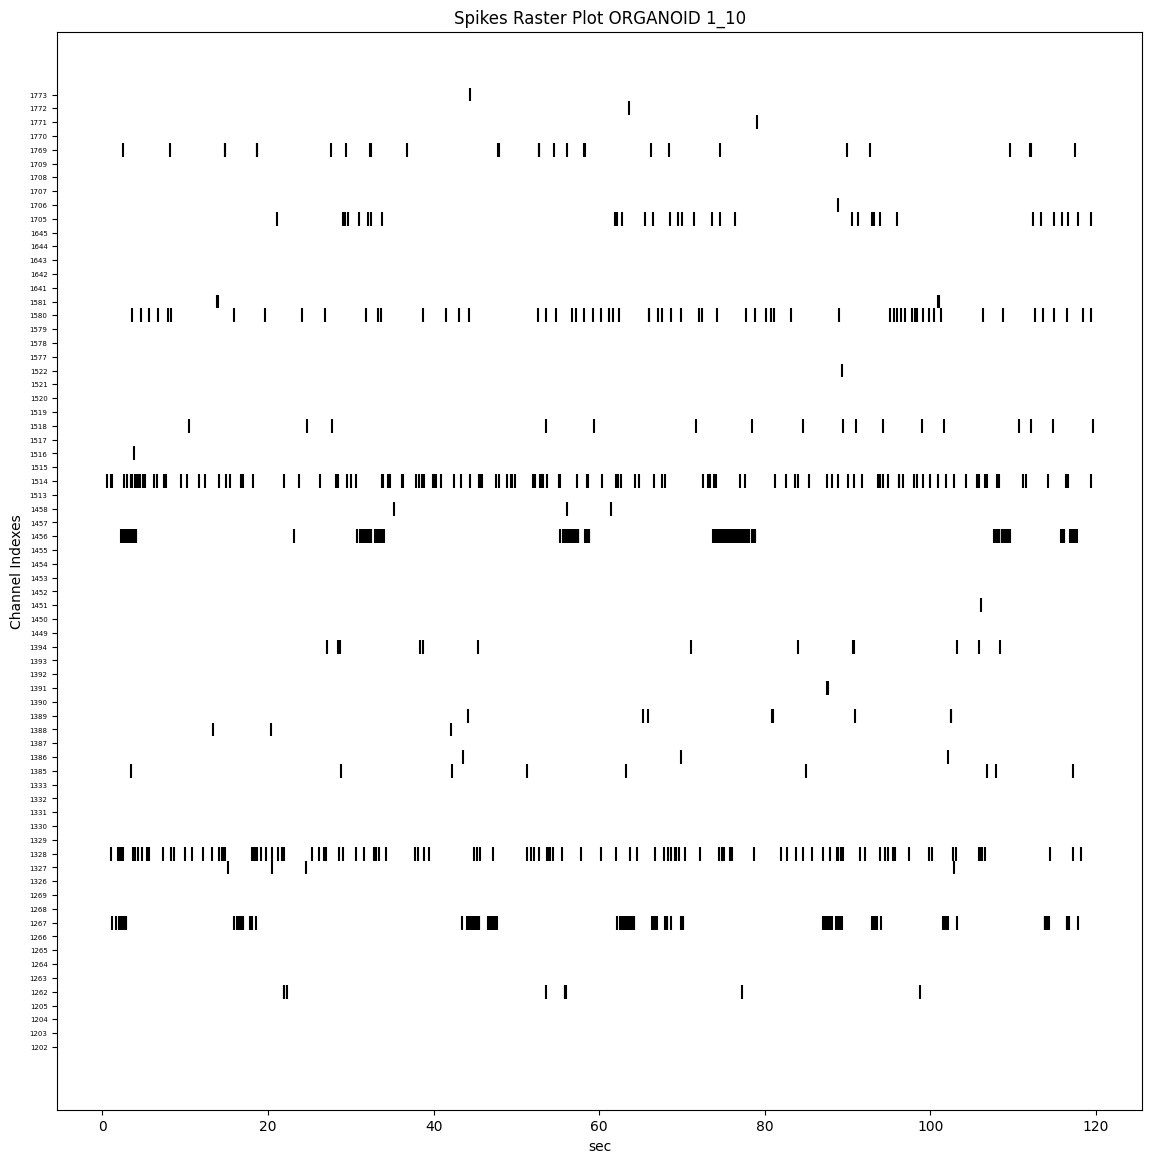

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

#define variables 
fileDirectory= 'D:\\Simone\\Fellowship\\MEA 2026\\EXP 0.1\\23-02-2026\\ORGANOID 1\\'
fileName = 'ORGANOIDE 1_Basale_10.bxr'
wellID = 'Well_A1'

dataStartPositionSec = 0
dataDurationSec = 120
#Open the BXR files 
file = h5py.File(fileDirectory + fileName, 'r')

#collect experiment information
samplingRate = 10000
#chIdxs = np.array([522,523,524,525,566,567,568,569,570,571,572,573,614,615,616,617,618,619,620,621,657,658,659,660,661,662,663,664,665,666,705,706,707,708,709,710,711,712,713,714,753,754,755,756,757,758,759,760,761,762,801,802,803,804,805,849,850,851,852,853,897,898,899,900,901,945,946,947,948,949])
chIdxs=np.arange(0, 4096, 1)
print(chIdxs)


#convert the requested time interval from seconds to frames
startFrame = int(dataStartPositionSec * samplingRate)
nFrames= int(dataDurationSec * samplingRate)



#collect the TOCs
toc = np.array(file['TOC'])
spikeToc = np.array(file[wellID + '/SpikeTOC'])

tocStartIdx= np.searchsorted(toc[:, 1], startFrame )
#print(tocStartIdx)
tocEndIdx = min(np.searchsorted(toc[:, 1], startFrame + nFrames, side='right') + 1, len(toc) - 1)
#print(tocEndIdx)
SpikeStartPosition=spikeToc[tocStartIdx]
SpikeEndPosition=spikeToc[tocEndIdx]
#print(SpikeStartPosition, SpikeEndPosition)

#collect the required spike data
spikeDataTimestamps=file[wellID + '/SpikeTimes'][SpikeStartPosition:SpikeEndPosition]
spikeDataChIdxs= file [wellID +'/SpikePlateElIdxs'][SpikeStartPosition:SpikeEndPosition]
#print(spikeDataChIdxs)
dataLength=SpikeEndPosition-SpikeStartPosition


#build the raster dataset with spike times and convert
#spike times from frame position to seconds for each channel


rasterData= [[] for _ in chIdxs]

for timestamp, ch_idx in zip(spikeDataTimestamps, spikeDataChIdxs):
    if startFrame <= timestamp < startFrame + nFrames:
        rasterData[ch_idx].append(timestamp/samplingRate)

Indexes=[]
rasterDataActive=[]

for ch, lista in enumerate(rasterData):
    if len(lista)> 10:
        Indexes.append(ch)
        rasterDataActive.append(lista)

print(Indexes)
#print(rasterDataActive)


#how to make a raster with only channels of the active area

IdxsAA = [522,523,524,525,566,567,568,569,570,571,572,573,614,615,616,617,618,619,620,621,657,658,659,660,661,662,663,664,665,666,705,706,707,708,709,710,711,712,713,714,753,754,755,756,757,758,759,760,761,762,801,802,803,804,805,849,850,851,852,853,897,898,899,900,901,945,946,947,948,949]

#collect indexes in 
IdxsAAA=[]



for i in IdxsAA:
    x=((i-47)//48 +2 +8)
    y=((i-47)%48 + 8)
    IdxsAAA.append(63+((x-2)*64)+y)

print(IdxsAAA)

rasterData=np.array(rasterData, dtype=object)
print(type(rasterData))
RasterDataActivity= rasterData[IdxsAAA]


file.close()

n=len(RasterDataActivity)

plt.figure(figsize=(14, 14))
plt.eventplot(RasterDataActivity, colors='black')
plt.title('Spikes Raster Plot ORGANOID 1_10')
plt.xlabel('sec')
plt.yticks(range(n), IdxsAAA, fontsize=5)
plt.ylabel('Channel Indexes')
plt.savefig('Raster.svg', format='svg')
plt.show()


#### Conversion of channels indexes from 48x48 to 64x64

In [3]:
#how to make a raster with only channels of the active area

Idxs48 = [522,523,524,525,566,567,568,569,570,571,572,573,614,615,616,617,618,619,620,621,657,658,659,660,661,662,663,664,665,666,705,706,707,708,709,710,711,712,713,714,753,754,755,756,757,758,759,760,761,762,801,802,803,804,805,849,850,851,852,853,897,898,899,900,901,945,946,947,948,949]

#collect indexes in 
Idxs64=[]



for i in Idxs48:
    x=((i-47)//48 +2 +8)
    y=((i-47)%48 + 8)
    Idxs64.append(63+((x-2)*64)+y)
print(Idxs64)

[1202, 1203, 1204, 1205, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1577, 1578, 1579, 1580, 1581, 1641, 1642, 1643, 1644, 1645, 1705, 1706, 1707, 1708, 1709, 1769, 1770, 1771, 1772, 1773]


## Implementing firing rate along the raster plot

<class 'numpy.ndarray'>
(241,) [ 0  1  1  3  3  6 12  8  9  6  4  3  2  1  2  2  2  3  1  0  2  2  1  0
  1  2  0  2  2  3  5  2  2  2  6  2  2  6  4  1  2  2  1  2  5  1  0  1
  1  1  2  1  0  2  3  1  2  2  4  4  2  1  4  3  8  7  2  8 10  3  1  1
  0  2  1  0  2  3  5  1  1  2  1  1  0  3  0  4  0  7  5  8  4  0  4  5
  5  0  1  2  1  0  0  2  2  3  6  2  6  2  2  3  7  7  7  9  1  6  6  2
  0  3  0  2  3  7  4  5  6  4  2  1  2  4  9  1  5  6  4  2  5  5  0  2
  1  3  1  3  5 10  9  7  4  8  6  6  6  4  7  1  0  1  3  2  1  0  2  1
  3  1  2  2  1  0  0  5 11  2  9  8  1  1  5  2  2  1  3  7  5  3  3  2
  4  4  2  1  1  4  2  2  3  2  2  2  8  4  4  3  0  1  0  0  4  4  4  0
  3  8  6  5  3  0  1  1  1  4  1  1  5  5  3  0  4  3 10 10  7  2  0  3
  1]


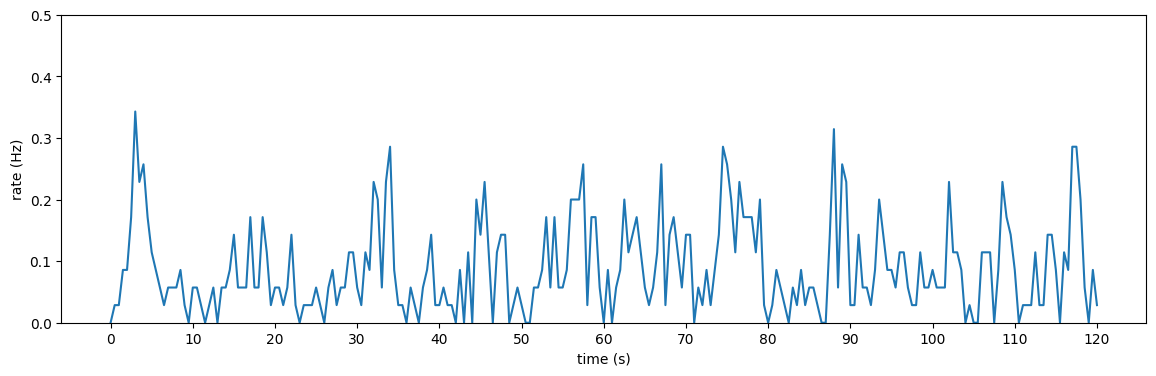

In [4]:
rasterData=np.array(rasterData, dtype=object)
print(type(rasterData))
RasterDataActivity= rasterData[IdxsAAA]
#print(RasterDataActivity.shape)
#print(RasterDataActivity) #print the list of o list for each channel belonging to the selected area

#Can we treat those np.array to make the mean? Because only np.array is useful to perform it
#I have to define a step and for each step I have to calculate the mean
#Since there are some empty list I don't know if it possibile
#Let's define the step
bin_width=0.5 #setting the bin_width in terms of milliseconds according to your sample
bins= np.arange(0, 120, bin_width)


all_spikes_times = np.concatenate(RasterDataActivity)
all_spikes_times=np.sort(all_spikes_times)
#print(all_spikes_times)

bin_assignement = np.digitize(all_spikes_times, bins)
spikes_n = np.bincount(bin_assignement)
print(spikes_n.shape, spikes_n)


n_channels= len(IdxsAAA)
firing_rate= spikes_n/(bin_width * n_channels)
#print(firing_rate.shape)
t_range= np.arange(0, 120, bin_width)
#print(t_range)



time_axis = np.arange(len(spikes_n)) * bin_width

plt.figure(figsize=(14, 4))
plt.plot(time_axis, firing_rate)
plt.xlabel('time (s)')
plt.xticks(np.arange(0, 121, 10))
plt.ylabel('rate (Hz)')
plt.ylim(0, 0.5)
plt.savefig('grafico.svg', format='svg')
plt.show()


## Using dictionary to store channel/timestamps information
### Selecting the most active channels for each subgroups and plot its raster plot

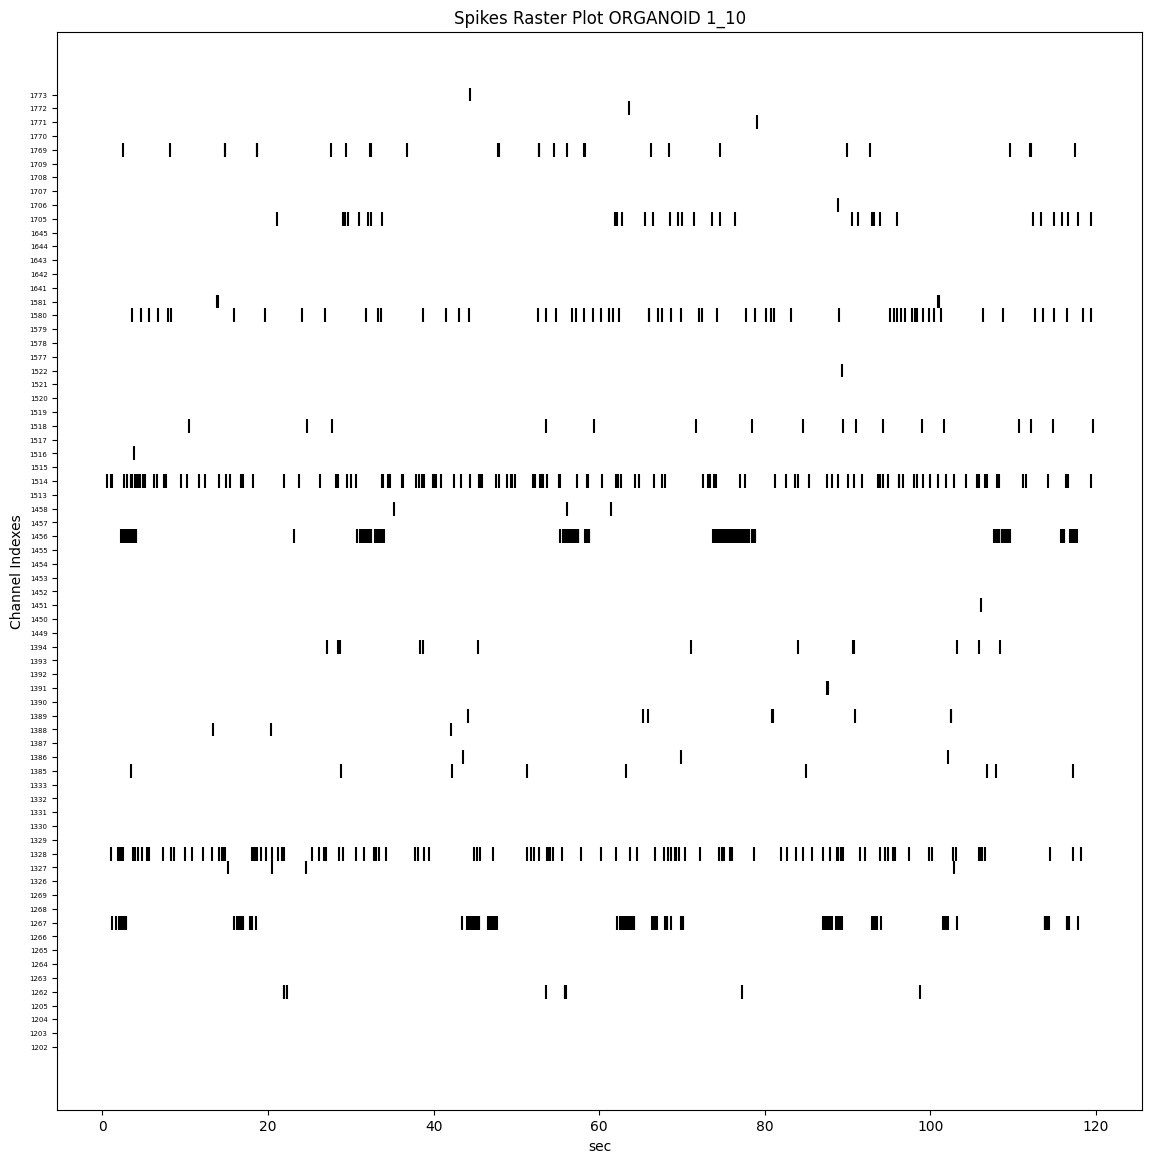

In [5]:
import pandas as pd

AllRasterData = {}

for i in range(len(rasterData)):
    AllRasterData[chIdxs[i]]=rasterData[i]

RestrictedRasterData= {}
for ch, index in enumerate(IdxsAAA):
    RestrictedRasterData[IdxsAAA[ch]]=AllRasterData[index]


#print(sorted(RestrictedRasterData))

n=len(IdxsAAA)

RestrictedRasterDataList=RestrictedRasterData.values()
#print(RestrictedRasterDataList)

plt.figure(figsize=(14, 14))
plt.eventplot(RestrictedRasterDataList, colors='black')
plt.title('Spikes Raster Plot ORGANOID 1_10')
plt.xlabel('sec')
plt.yticks(range(n), sorted(RestrictedRasterData), fontsize=5)
plt.ylabel('Channel Indexes')
plt.savefig('Raster.svg', format='svg')
plt.show()


### Filter channels based on the number of spikes and keep the index in the visualization

[1267, 1328, 1394, 1456, 1514, 1518, 1580, 1705, 1769]


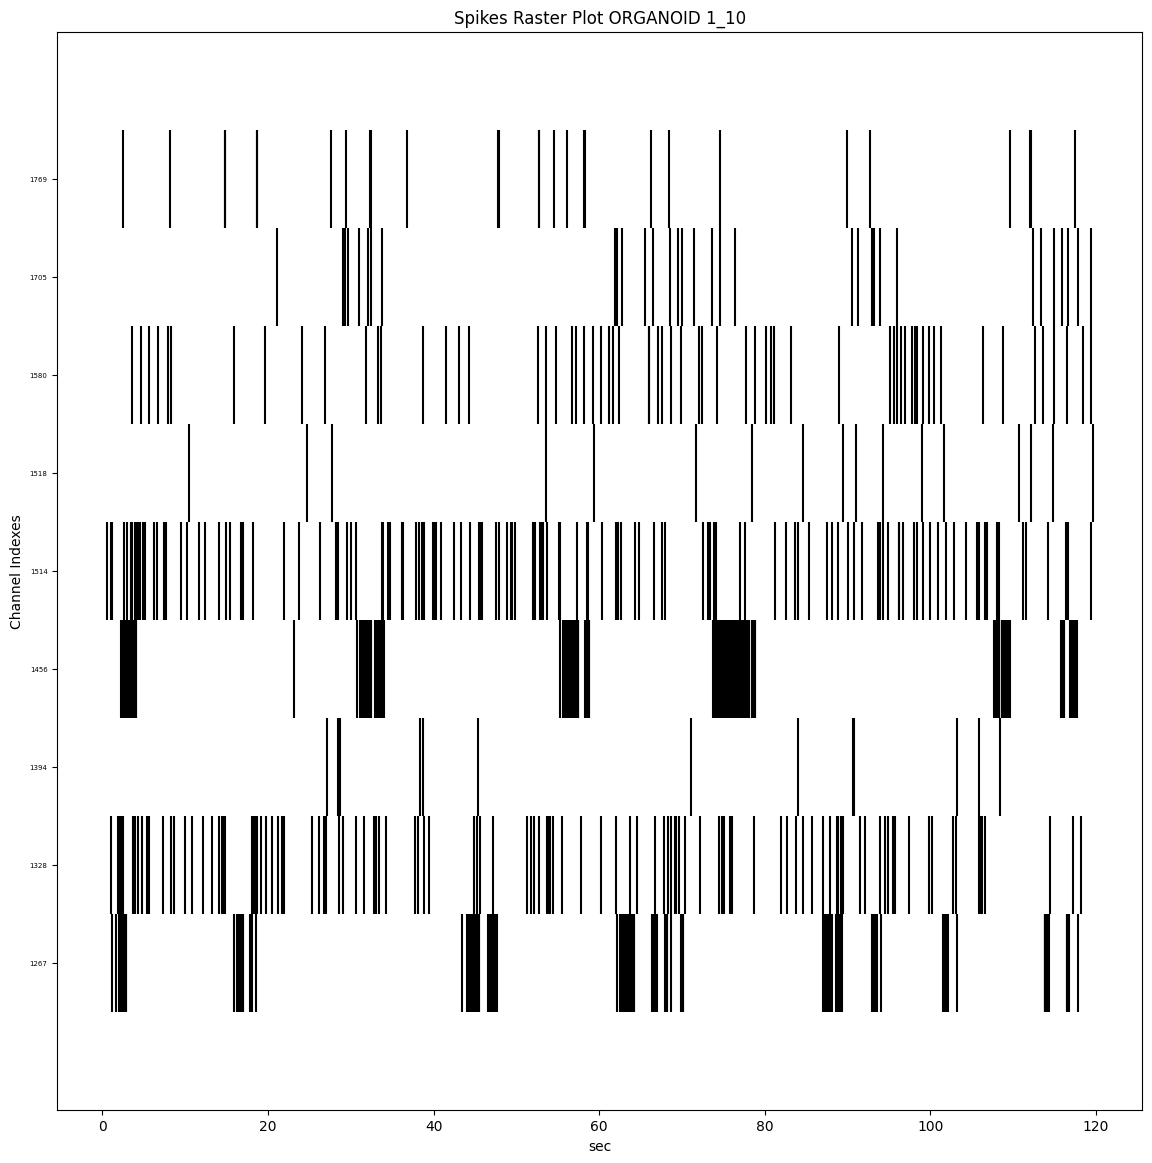

In [6]:
FilteredRasterData = {}
ActiveIndexes=[]

for ch, index in enumerate(IdxsAAA):
    if len(RestrictedRasterData[index]) > 10:
        FilteredRasterData[index]=RestrictedRasterData[index]
        ActiveIndexes.append(index)

print(ActiveIndexes)



FilteredRasterDataList=FilteredRasterData.values()

n=len(FilteredRasterData.keys())

plt.figure(figsize=(14, 14))
plt.eventplot(FilteredRasterDataList, colors='black')
plt.title('Spikes Raster Plot ORGANOID 1_10')
plt.xlabel('sec')
plt.yticks(range(n), sorted(FilteredRasterData), fontsize=5)
plt.ylabel('Channel Indexes')
plt.savefig('Raster.svg', format='svg')
plt.show()